In [3]:
import random
import itertools
from paddle.vision.datasets import Cifar10,MNIST
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cifar10_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
np.random.seed(2024)
I = np.array(
    [[1,2,3],[4,5,6],[7,8,9]]
)
matrix1 = np.random.choice([0, 255], size=(3, 3), p=[0.5, 0.5])  

print(I)
print(matrix1)
I ^ matrix1

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[255 255   0]
 [  0   0   0]
 [255 255   0]]


array([[254, 253,   3],
       [  4,   5,   6],
       [248, 247,   9]])

In [6]:
Kr, Kg, Kb = 2022,2023,2024
Kc = (Kr, Kg, Kb)

In [7]:
cifar10_train = Cifar10(
    mode= 'train',
    backend="cv2"   # 指定要返回的图像类型：PIL.Image 或 numpy.ndarray。必须是 {'pil'，'cv2'} 中的值
)

mnist_train = MNIST(
    mode= 'train',
    backend="cv2" 
)

img0,label0 = cifar10_train[0]

In [8]:
img0 = img0.astype("uint8")

In [9]:
r = img0[:, :, 0]
g = img0[:, :, 1]
b = img0[:, :, 2]

Kr, Kg, Kb = 2022,2023,2024
np.random.seed(Kr)
Ir = np.random.choice([0, 255], size=(32, 32), p=[0.5, 0.5])
np.random.seed(Kg)
Ig = np.random.choice([0, 255], size=(32, 32), p=[0.5, 0.5])
np.random.seed(Kb)
Ib = np.random.choice([0, 255], size=(32, 32), p=[0.5, 0.5])

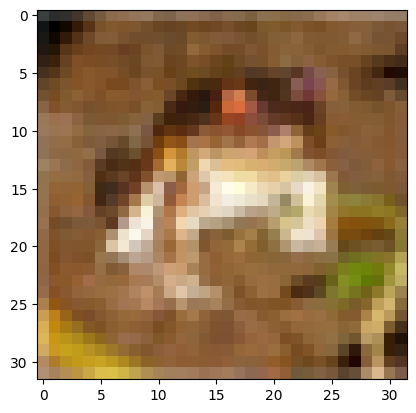

In [10]:
plt.imshow(img0/255)

In [11]:
r

array([[ 59,  43,  50, ..., 158, 152, 148],
       [ 16,   0,  18, ..., 123, 119, 122],
       [ 25,  16,  49, ..., 118, 120, 109],
       ...,
       [208, 201, 198, ..., 160,  56,  53],
       [180, 173, 186, ..., 184,  97,  83],
       [177, 168, 179, ..., 216, 151, 123]], dtype=uint8)

In [12]:
Ir

array([[  0,   0,   0, ...,   0, 255,   0],
       [255,   0, 255, ...,   0, 255,   0],
       [255, 255, 255, ...,   0,   0, 255],
       ...,
       [  0, 255,   0, ..., 255, 255,   0],
       [255,   0, 255, ...,   0, 255,   0],
       [  0, 255,   0, ..., 255, 255, 255]])

In [13]:
img2xor = np.dstack((r^Ir, g^Ig, b^Ib))

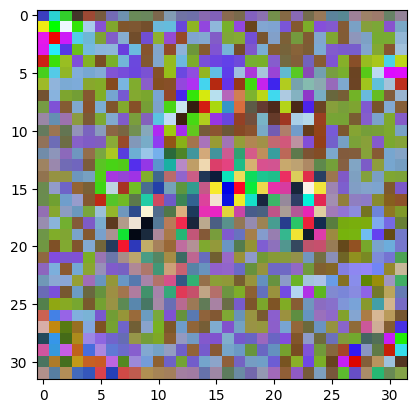

In [14]:
plt.imshow(img2xor)

In [15]:
# Ks = random.randint(0,6)
def shuffle_colors(Ks):
    if Ks == 0:
        img2xor = np.dstack((r^Ir, g^Ig, b^Ib))
    elif Ks == 1:
        img2xor = np.dstack((r^Ir, b^Ib, g^Ig))
    elif Ks == 2:
        img2xor = np.dstack((g^Ig, r^Ir, b^Ib))
    elif Ks == 3:
        img2xor = np.dstack((g^Ig, b^Ib, r^Ir))
    elif Ks == 4:
        img2xor = np.dstack((b^Ib, r^Ir, g^Ig))
    elif Ks == 5:
        img2xor = np.dstack((b^Ib, g^Ig, r^Ir))
    return img2xor

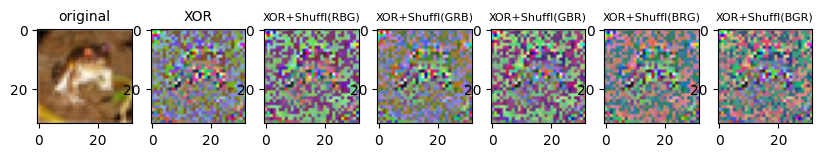

In [16]:
fig = plt.figure(figsize=(10,10)) 
ax1 = fig.add_subplot(1, 7, 1)  # 2行1列，第1个位置  
plt.title('original',fontsize=10)
ax1.imshow(img0,cmap='gray')

ax2 = fig.add_subplot(1, 7, 2)
plt.title('XOR',fontsize=10)
ax2.imshow(img2xor,cmap='gray')

ax3 = fig.add_subplot(1, 7, 3)
plt.title('XOR+Shuffl(RBG)',fontsize=8)
ax3.imshow(shuffle_colors(1),cmap='gray')

ax4 = fig.add_subplot(1, 7, 4)
plt.title('XOR+Shuffl(GRB)',fontsize=8)
ax4.imshow(shuffle_colors(2),cmap='gray')

ax5 = fig.add_subplot(1, 7, 5)
plt.title('XOR+Shuffl(GBR)',fontsize=8)
ax5.imshow(shuffle_colors(3),cmap='gray')

ax6 = fig.add_subplot(1, 7, 6)
plt.title('XOR+Shuffl(BRG)',fontsize=8)
ax6.imshow(shuffle_colors(4),cmap='gray')

ax7 = fig.add_subplot(1, 7, 7)
plt.title('XOR+Shuffl(BGR)',fontsize=8)
ax7.imshow(shuffle_colors(5),cmap='gray')

In [17]:
img0,label0 = mnist_train[0]
np.random.seed(2024)
I = np.random.choice([0, 255], size=(28, 28), p=[0.5, 0.5])

In [18]:
img0 = img0.astype("uint8")
img2xor = img0 ^ I

In [19]:
img2xor

array([[255, 255,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255,
        255, 255, 255,   0,   0, 255, 255,   0,   0, 255,   0,   0, 255,
        255, 255],
       [  0,   0,   0, 255,   0,   0, 255,   0, 255, 255,   0,   0,   0,
          0, 255, 255, 255,   0, 255, 255,   0, 255,   0, 255, 255, 255,
          0,   0],
       [255, 255,   0, 255,   0,   0, 255, 255, 255,   0, 255, 255, 255,
          0, 255, 255,   0, 255,   0, 255,   0, 255, 255, 255,   0,   0,
        255,   0],
       [255,   0,   0,   0, 255,   0,   0, 255, 255,   0,   0, 255, 255,
        255, 255,   0, 255, 255, 255, 255, 255,   0, 255,   0, 255,   0,
          0, 255],
       [255,   0, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255, 255,
          0,   0, 255,   0,   0,   0, 255,   0,   0,   0, 255, 255,   0,
        255,   0],
       [255,   0, 255, 255, 255, 255,   0,   0, 255,   0,   0, 255,   3,
        237,  18,  18, 126, 136,  80,  26, 166,   0, 247, 128, 255, 255,
        255, 255],
       [25

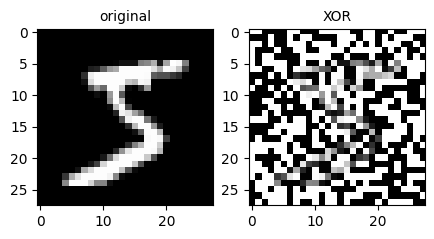

In [20]:
fig = plt.figure(figsize=(5,5)) 
ax1 = fig.add_subplot(1, 2, 1) 
plt.title('original',fontsize=10)
ax1.imshow(img0,cmap='gray')

ax2 = fig.add_subplot(1, 2, 2) 
plt.title('XOR',fontsize=10)
plt.imshow(img2xor,cmap='gray')

# 复现完成

In [24]:
class Pixel_XOR_Color_Shuffle:
    def __init__(self,Kc,Ks):
        self.method_label ="Pixel_XOR_Color_Shuffle"
        self.Kc = Kc
        self.Ks = Ks
    
    def generate_I(self):
        Kr,Kg,Kb = self.Kc
        np.random.seed(Kr)
        self.Ir = np.random.choice([0, 255], size=(32, 32), p=[0.5, 0.5])
        np.random.seed(Kg)
        self.Ig = np.random.choice([0, 255], size=(32, 32), p=[0.5, 0.5])
        np.random.seed(Kb)
        self.Ib = np.random.choice([0, 255], size=(32, 32), p=[0.5, 0.5])
                
    def img_XOR(self,img):
        self.generate_I()
        r = img[:, :, 0]
        g = img[:, :, 1]
        b = img[:, :, 2]
        return np.dstack((r^self.Ir, g^self.Ig, b^self.Ib))
        
    def shuffle_colors(self,img_xored,Ks):
        r = img_xored[:, :, 0]
        g = img_xored[:, :, 1]
        b = img_xored[:, :, 2]
        if Ks == 0:
            img_xored_shuffled = np.dstack((r, g, b))
        elif Ks == 1:
            img_xored_shuffled = np.dstack((r, b, g))
        elif Ks == 2:
            img_xored_shuffled = np.dstack((g, r, b))
        elif Ks == 3:
            img_xored_shuffled = np.dstack((g, b, r))
        elif Ks == 4:
            img_xored_shuffled = np.dstack((b, r, g))
        elif Ks == 5:
            img_xored_shuffled = np.dstack((b, g, r))
        return img_xored_shuffled

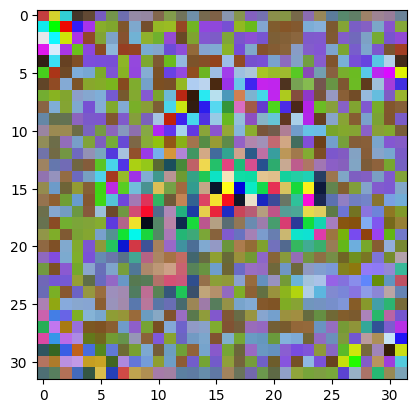

In [34]:
object = Pixel_XOR_Color_Shuffle(Kc=(2024,2025,2026),Ks=2)
img0 = cifar10_train[0][0].astype('uint8')
img02xor = object.img_XOR(img0)
plt.imshow(img02xor,cmap='gray')

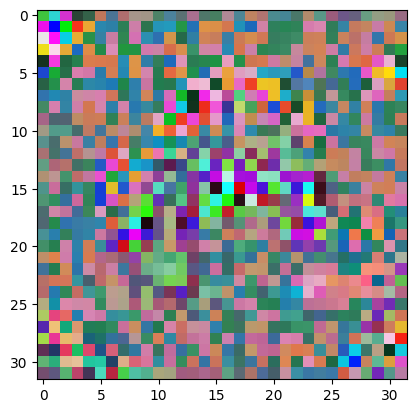

In [42]:
img02xor2shuffle = object.shuffle_colors(img02xor,Ks=4)
plt.imshow(img02xor2shuffle,cmap='gray')